## Descenso del Gradiente (aplicacion)

## En Inteligencia Artificial

En el contexto de Aprendizaje Automático se requiere optimizar funciones de costo, lo cual se realiza generalmente con el método de **Descenso de Gradiente**, usado en entrenamiento de redes neuronales.


### Optimización de los pesos

Al minimizar esta pérdida con respecto a los parámetros de la red, podemos encontrar configuraciones donde la pérdida es mínima y la red puede predecir las etiquetas correctas con alta precisión. El gradiente es la pendiente de la función de pérdida y apunta en la dirección del cambio más rápido. Para llegar al mínimo en la menor cantidad de tiempo, entonces queremos seguir el gradiente (hacia abajo). Puedes pensar en esto como descender una montaña siguiendo la pendiente más empinada hasta la base.

En Aprendizaje Automático a $\alpha$ se denomina **learning rate** y es uno de los hiperparámetros de mayor importancia en el entrenamiento de redes neuronales y hay técnicas de ajuste como: step, coseno, rampa, exponencial, entre otros. [Mayor información](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)

}Veamos a emplear el método del descenso del gradiente para una de las tareas más empleadas en Inteligencia Artificial: Clasificación mediante la clase `SGDClassifier` de `scikit-learn`


El Descenso Gradiente Estocástico (SGD) es un método sencillo pero muy eficaz para ajustar clasificadores y regresores lineales con funciones de pérdida (**loss functions**) convexas.

Es importante destacar que el SGD es una técnica de optimización y no pertenece a una famila específica de modelos de aprendizaje automático. Por lo tanto, es necesario indicar una funciín de pérdida la cual se optimiza mediante SGD.

Se va utilizar la base de datos **Iris**. Que contine 50 muestras de tres tipos de flores Iris: Iris setosa, Iris virginica e Iris versicolor. La base de datos presenta de cada muestra: el largo y ancho del sépalo y pétalo.

Más información [en el siguiente enlace](https://archive.ics.uci.edu/dataset/53/iris)

In [2]:
# importar la base de datos iris desde scikit learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


In [3]:
#cargar la base de datos y dividir en entrenamiento y test
iris = load_iris()
X = iris.data
y = iris.target

print(iris.keys())
print(iris["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Observemos las dimesiones del sépalo y pétalo de las muestras

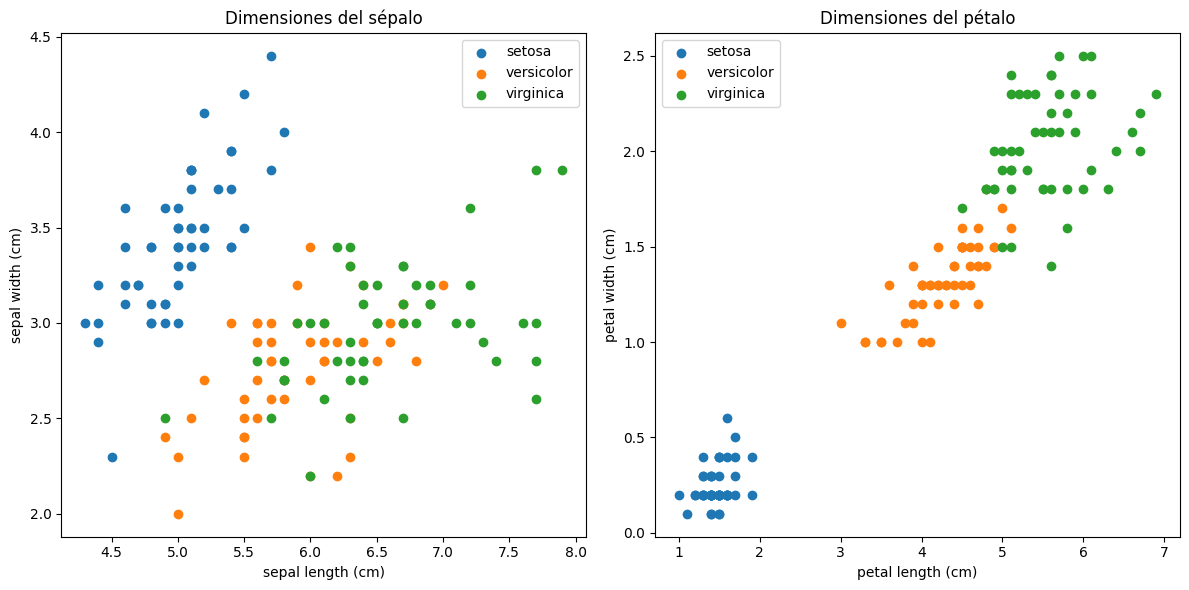

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar las dimensiones del sépalo
for i in np.unique(y):
    axs[0].scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i])
axs[0].set_xlabel(iris.feature_names[0])
axs[0].set_ylabel(iris.feature_names[1])
axs[0].legend()
axs[0].set_title("Dimensiones del sépalo")

# Graficar las dimensiones del pétalo
for i in np.unique(y):
    axs[1].scatter(X[y == i, 2], X[y == i, 3], label=iris.target_names[i])
axs[1].set_xlabel(iris.feature_names[2])
axs[1].set_ylabel(iris.feature_names[3])
axs[1].legend()
axs[1].set_title("Dimensiones del pétalo")

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar la figura
plt.show()


Vamos a entrenar un primer modelo empleando únicamente las dimensiones del sepalo.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std

Por defecto la función de perdida es "hinge" pero tambien a acepta otras funciones. Mayor información en el [enlace.](https://scikit-learn.org/stable/modules/sgd.html)

In [7]:

clf = SGDClassifier(loss="hinge", penalty="l2",alpha=0.001, max_iter=50)
clf.fit(X_train, y_train)


,loss,'hinge'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,50
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


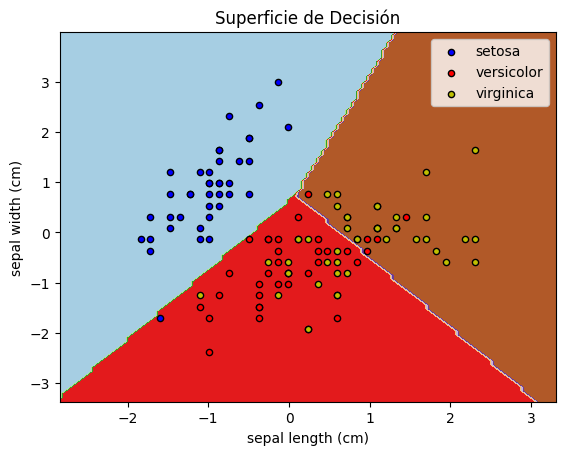

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
colors = "bry"
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 0],
        X_train[idx, 1],
        c=color,
        label=iris.target_names[i],
        edgecolor="black",
        s=20,
    )
plt.title("Superficie de Decisión")
plt.axis("tight")
plt.legend()
plt.show()


In [9]:
# obtener predicciones en el conjunto test
y_pred = clf.predict(X_test)

In [10]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 2, 0, 0])

In [11]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
# metricas de desmpeño
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8

Probar con otras funciones de pérdida.

## Empleando todas las características

In [13]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std


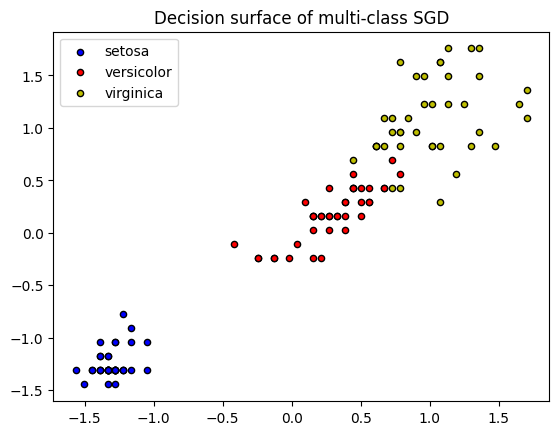

In [18]:
clf = SGDClassifier(loss="hinge", penalty="l2",alpha=0.001, max_iter=50)
clf.fit(X_train, y_train)

colors = "bry"


# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y_train == i)
    plt.scatter(
        X_train[idx, 2],
        X_train[idx, 3],
        c=color,
        label=iris.target_names[i],
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")
plt.legend()
plt.show()

In [19]:
# obtener predicciones en el conjunto test
y_pred = clf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
accuracy

1.0

## Como red Neuronal

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [21]:
# preprocesamiento de la base de datos
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalizacion
x_mean=X_train.mean(axis=0)
x_std=X_train.std(axis=0)
X_train=(X_train-x_mean)/x_std
X_test=(X_test-x_mean)/x_std


In [22]:
# formo dataloaders, tipo de datos de pytorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [23]:
# defino mi modelo de red neuronal, con una capa oculta

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [24]:
# Entrenamiento de la red neuronal. Guardo el historial de loss y accuracy
def train(model, train_loader,val_loader, optimizer, criterion, devic, epochs=100):
    loss_train = []
    loss_val = []
    accuracy_train = []
    accuracy_val = []
    model.train()


    for epoch in range(epochs):
        train_loss = 0.0
        train_correct = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_correct += (predicted == labels).sum().item()
        train_loss /= len(train_loader)
        train_accuracy = train_correct / len(train_loader.dataset)
        loss_train.append(train_loss)
        accuracy_train.append(train_accuracy)


        model.eval()
        val_loss = 0.0
        val_correct = 0
        # apply torch.no_grad to disable gradient calculation during validation
        with torch.no_grad(): # added parentheses
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_correct += (predicted == labels).sum().item()

        # guardo el historial
        val_loss /= len(val_loader)
        val_accuracy = val_correct / len(val_loader.dataset)
        loss_val.append(val_loss)
        accuracy_val.append(val_accuracy)


    return loss_train, loss_val, accuracy_train, accuracy_val

In [25]:
# genero mi modelo de red neuronal
# capa de entrada con 4 neuronas (4 características )
# una capa oculata con 2 neuronas (puede variar)
# capa de salidad con 3 neuronas (tres clases)

Model=NeuralNetwork(4,2,3)

In [26]:
# parametros de entrenamiento
optimizer = torch.optim.SGD(Model.parameters(), lr=0.1)               # SGD
criterion = nn.CrossEntropyLoss()                                     # función de pérdida
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU o CPU
Model.to(device)
loss_train, loss_val, accuracy_train, accuracy_val=train(Model, train_loader,test_loader, optimizer, criterion, device, epochs=100)

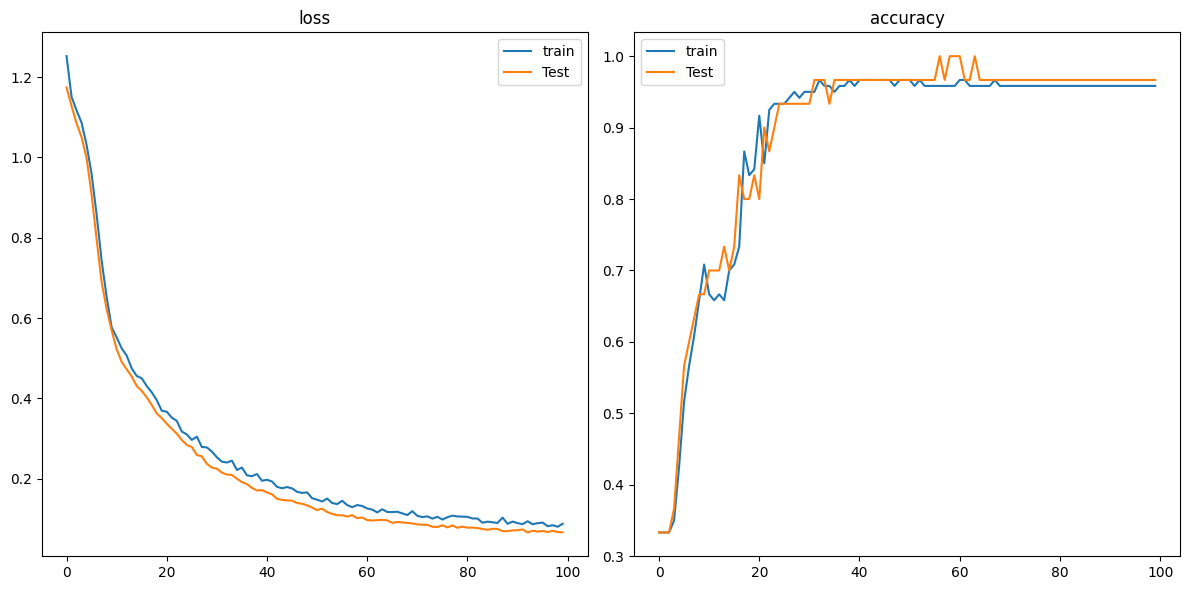

In [27]:
# grafico el loss y accuracy de train y validadción
# en un subplot el loss y otro el accuracy


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el loss
axs[0].plot(loss_train, label="train")
axs[0].plot(loss_val, label="Test")
axs[0].legend()
axs[0].set_title("loss")

# Graficar el accuracy
axs[1].plot(accuracy_train, label="train")
axs[1].plot(accuracy_val, label="Test")
axs[1].legend()
axs[1].set_title("accuracy")

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar la figura
plt.show()


In [28]:
# nuevas predicciones

# evaluar el modelo
Model.eval()
with torch.no_grad():
    outputs = Model(X_test_tensor.to(device))
    _, predicted = torch.max(outputs.data, 1)

# tensor a numpy
predicted = predicted.cpu().numpy()

# accuracy
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)



Accuracy: 0.9666666666666667


In [29]:
predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])